# WeatherPy

In [1]:
import sys
sys.path.append("..")

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
WeatherPy = pd.read_csv('output_data/cities.csv',index_col='City')
WeatherPy.reset_index(inplace=True)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
WeatherPy

,City,City_ID,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ostrovnoy,0,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,mahebourg,1,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,qaanaaq,2,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,zhuhai,3,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,cape town,4,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,yabrud,543,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,paraiso,544,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,veraval,545,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,novyy urgal,546,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls

In [5]:
import pprint 

In [6]:
print.print()

AttributeError: 'builtin_function_or_method' object has no attribute 'print'

In [7]:
url = "https://api.openweathermap.org/data/2.5/weather"

# use iterrows to iterate through pandas dataframe
for index, row in WeatherPy.iterrows():
    
    params = {
    "appid": weather_api_key,
}

    # get city name from df
    city_name = row['City']

    # add keyword to params dict
    params['q'] = city_name

    # assemble url and make API request
    response = requests.get(url, params=params).json()
    
    #pprint.pprint(response)
    
    try:
        print(f"Processing Record {index} | {city_name}")
        
        # extract results
        results = response["name"]
     
    except (KeyError, IndexError):
        print("City not found... skipping.")

Processing Record 0 | ostrovnoy
Processing Record 1 | mahebourg
Processing Record 2 | qaanaaq
Processing Record 3 | zhuhai
Processing Record 4 | cape town
Processing Record 5 | atuona
Processing Record 6 | flinders
Processing Record 7 | opuwo
Processing Record 8 | tiksi
Processing Record 9 | pushkinskiye gory
Processing Record 10 | aykhal
Processing Record 11 | castro
Processing Record 12 | avarua
Processing Record 13 | saskylakh
Processing Record 14 | constitucion
Processing Record 15 | albany
Processing Record 16 | vilyuysk
Processing Record 17 | ushuaia
Processing Record 18 | bambous virieux
Processing Record 19 | kodinsk
Processing Record 20 | teknaf
Processing Record 21 | busselton
Processing Record 22 | ambon
Processing Record 23 | maragogi
Processing Record 24 | fallon
Processing Record 25 | kantang
Processing Record 26 | colonelganj
Processing Record 27 | punta arenas
Processing Record 28 | rikitea
Processing Record 29 | new norfolk
Processing Record 30 | gobabis
Processing Rec

Processing Record 249 | lebu
Processing Record 250 | port lincoln
Processing Record 251 | leningradskiy
Processing Record 252 | kajaani
Processing Record 253 | murray bridge
Processing Record 254 | rocha
Processing Record 255 | tagusao
Processing Record 256 | cobija
Processing Record 257 | port-gentil
Processing Record 258 | te anau
Processing Record 259 | hami
Processing Record 260 | pahrump
Processing Record 261 | fort frances
Processing Record 262 | umtata
Processing Record 263 | markova
Processing Record 264 | saint-leu
Processing Record 265 | jalu
Processing Record 266 | alice springs
Processing Record 267 | zaraza
Processing Record 268 | dingle
Processing Record 269 | bodden town
Processing Record 270 | griffith
Processing Record 271 | coihaique
Processing Record 272 | sao felix do xingu
Processing Record 273 | santa rosa
Processing Record 274 | goderich
Processing Record 275 | vila velha
Processing Record 276 | rabo de peixe
Processing Record 277 | soyo
Processing Record 278 | c

Processing Record 496 | chernaya kholunitsa
Processing Record 497 | havelock
Processing Record 498 | traverse city
Processing Record 499 | champoton
Processing Record 500 | mandalgovi
Processing Record 501 | delemont
Processing Record 502 | chauk
Processing Record 503 | kambove
Processing Record 504 | tutoia
Processing Record 505 | touros
Processing Record 506 | babati
Processing Record 507 | graaff-reinet
Processing Record 508 | noumea
Processing Record 509 | pilot butte
Processing Record 510 | atar
Processing Record 511 | valenca do piaui
Processing Record 512 | natchez
Processing Record 513 | denpasar
Processing Record 514 | loikaw
Processing Record 515 | madaoua
Processing Record 516 | malindi
Processing Record 517 | along
Processing Record 518 | bonito
Processing Record 519 | saint anthony
Processing Record 520 | high prairie
Processing Record 521 | high rock
Processing Record 522 | raudeberg
Processing Record 523 | kununurra
Processing Record 524 | mogadishu
Processing Record 525

### Convert Raw Data to DataFrame

In [24]:
city_data = WeatherPy.loc[:,["City","Lat","Lng","Max Temp","Humidity", "Cloudiness","Wind Speed","Country", "Date"]]
city_data["Lat"] = city_data["Lat"].map("{:,.2f}".format)
city_data["Lng"] = city_data["Lng"].map("{:,.2f}".format)
city_data["Max Temp"] = city_data["Max Temp"].map("{:,.2f}".format)
city_data["Wind Speed"] = city_data["Wind Speed"].map("{:,.2f}".format)
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ostrovnoy,68.05,39.51,37.50,72,2,7.16,RU,1558378754
1,mahebourg,-20.41,57.70,78.80,74,75,11.41,MU,1558378503
2,qaanaaq,77.48,-69.36,22.20,73,25,2.37,GL,1558378755
3,zhuhai,40.71,112.04,44.60,39,0,4.47,CN,1558378755
4,cape town,-33.93,18.42,55.99,76,20,8.05,ZA,1558378755
...,...,...,...,...,...,...,...,...,...
543,yabrud,33.97,36.66,80.60,32,0,8.05,SY,1558378840
544,paraiso,24.01,-104.61,84.20,4,5,16.11,MX,1558378898
545,veraval,49.65,0.71,61.00,62,0,8.05,FR,1558378898
546,novyy urgal,51.07,132.56,49.74,93,100,2.68,RU,1558378899


In [9]:
print(city_data.describe(include='all'))  

             City    Lat    Lng Max Temp   Humidity  Cloudiness Wind Speed  \
count           5      5      5        5   5.000000     5.00000          5   
unique          5      5      5        5        NaN         NaN          5   
top     mahebourg  77.48  39.51    37.50        NaN         NaN       2.37   
freq            1      1      1        1        NaN         NaN          1   
mean          NaN    NaN    NaN      NaN  66.800000    24.40000        NaN   
std           NaN    NaN    NaN      NaN  15.610894    30.31996        NaN   
min           NaN    NaN    NaN      NaN  39.000000     0.00000        NaN   
25%           NaN    NaN    NaN      NaN  72.000000     2.00000        NaN   
50%           NaN    NaN    NaN      NaN  73.000000    20.00000        NaN   
75%           NaN    NaN    NaN      NaN  74.000000    25.00000        NaN   
max           NaN    NaN    NaN      NaN  76.000000    75.00000        NaN   

       Country          Date  
count        5  5.000000e+00  
u

### Inspect the data and remove the cities where the humidity > 100%.

In [10]:
high_humidity= city_data.loc[city_data["Humidity"]>100]
high_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data

### Latitude vs. Temperature Plot

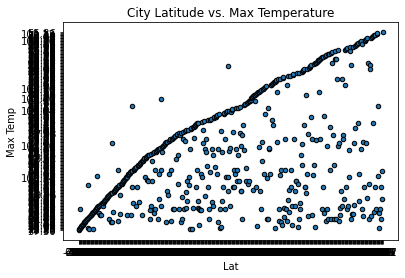

In [41]:
city_data.plot(kind="scatter", x="Lat", y="Max Temp", title="City Latitude vs. Max Temperature", facecolors="blue", edgecolors="black")
plt.show()

#### The code is analyzing the relationship between city latitude and max temperature. We find that as latitude increases away from the equator, the max temperature decreases. 

### Latitude vs. Humidity Plot

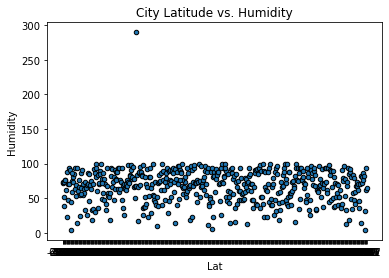

In [42]:
city_data.plot(kind="scatter", x="Lat", y="Humidity", title="City Latitude vs. Humidity", facecolors="blue", edgecolors="black")
plt.show()

#### The code is analyzing the relationship between city latitude and humidity. We find that there is no direct relationship between latitude and humidity, as data across several points of latitude have 100% humidity.

### Latitude vs. Cloudiness Plot

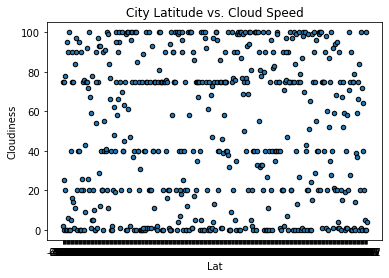

In [43]:
city_data.plot(kind="scatter", x="Lat", y="Cloudiness",title="City Latitude vs. Cloud Speed", facecolors="blue", edgecolors="black")
plt.show()

#### The code is analyzing the relationship between city latitude and cloudiness. We find that there is no direct relationship between latitude and cloudiness, as data across several points of latitude have anywhere from 0-100% cloudiness.

### Latitude vs. Wind Speed Plot

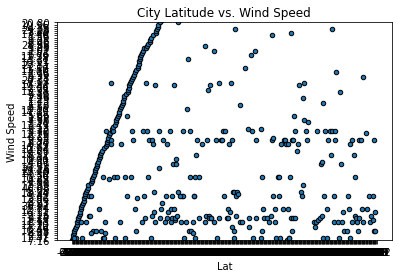

In [44]:
city_data.plot(kind="scatter", x="Lat", y="Wind Speed",title="City Latitude vs. Wind Speed", facecolors="blue", edgecolors="black", ylim=(0, 100))
plt.show()

#### The code is analyzing the relationship between city latitude and wind speed. We find that wind speed remains relatively consistent, predominantly in the range of 0-10 mph, across all latitudes.

## Linear Regression